<a href="https://colab.research.google.com/github/mosiah-andrade/Data-science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TADS 042

Aluno:

Mosiah Andrade

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [18]:
df_train = pd.read_csv('train.csv')
print("\nPrimeiras 5 linhas do dataset original:")
print(df_train.head())


Primeiras 5 linhas do dataset original:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

INICIANDO TRATAMENTO DOS DADOS

In [25]:
age_median = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(age_median)
print(f"Valores ausentes em 'Age' preenchidos com a mediana: {age_median}")
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embarked_mode)
print(f"Valores ausentes em 'Embarked' preenchidos com a moda: '{embarked_mode}'")
df_train.drop('Cabin', axis=1, inplace=True)
print("Coluna 'Cabin' foi removida devido ao excesso de valores nulos.")

Valores ausentes em 'Age' preenchidos com a mediana: 28.0
Valores ausentes em 'Embarked' preenchidos com a moda: 'S'
Coluna 'Cabin' já foi removida.


In [26]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
print("Coluna 'Sex' convertida para formato numérico (0: male, 1: female).")
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked', drop_first=True)
print("Coluna 'Embarked' convertida usando One-Hot Encoding.")
scaler = StandardScaler()
df_train[['Age', 'Fare']] = scaler.fit_transform(df_train[['Age', 'Fare']])
print("Colunas numéricas 'Age' e 'Fare' foram padronizadas.")
print("\n--- TRATAMENTO DOS DADOS CONCLUÍDO ---")

Coluna 'Sex' convertida para formato numérico (0: male, 1: female).
Coluna 'Embarked' convertida usando One-Hot Encoding.
Colunas numéricas 'Age' e 'Fare' foram padronizadas.

--- TRATAMENTO DOS DADOS CONCLUÍDO ---


ANÁLISE DESCRITIVA

In [29]:
print("Primeiras 5 linhas de 'Age' e 'Fare' após padronização:")
display(df_train[['Age', 'Fare']].head())

Primeiras 5 linhas de 'Age' e 'Fare' após padronização:


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


In [31]:
print("\nFrequência de Passageiros por Classe:")
print(df_train['Pclass'].value_counts())
print("\nFrequência de Passageiros por Sexo:")
print(df_train['Sex'].value_counts().rename({0: 'Masculino', 1: 'Feminino'}))



Frequência de Passageiros por Classe:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Frequência de Passageiros por Sexo:
Sex
Masculino    577
Feminino     314
Name: count, dtype: int64


GERANDO E SALVANDO VISUALIZAÇÕES

Gráfico 1/5: 'histograma_idade.png' salvo.


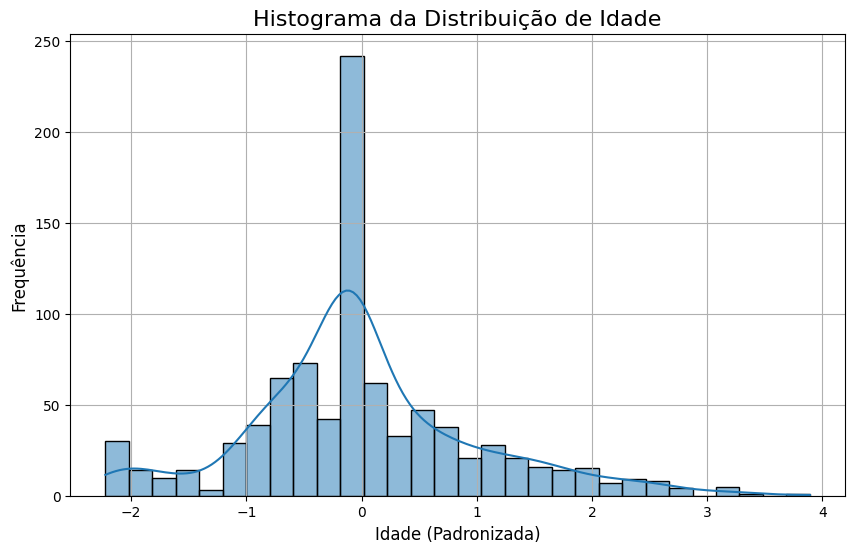

In [32]:
# Gráfico 1: Histograma da Distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], kde=True, bins=30)
plt.title('Histograma da Distribuição de Idade', fontsize=16)
plt.xlabel('Idade (Padronizada)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.savefig('histograma_idade.png')
print("Gráfico 1/5: 'histograma_idade.png' salvo.")
plt.show() # Exibe o gráfico no notebook

/tmp/ipython-input-450486049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df_train, palette='plasma')


Gráfico 2/5: 'sobrevivencia_por_sexo.png' salvo.


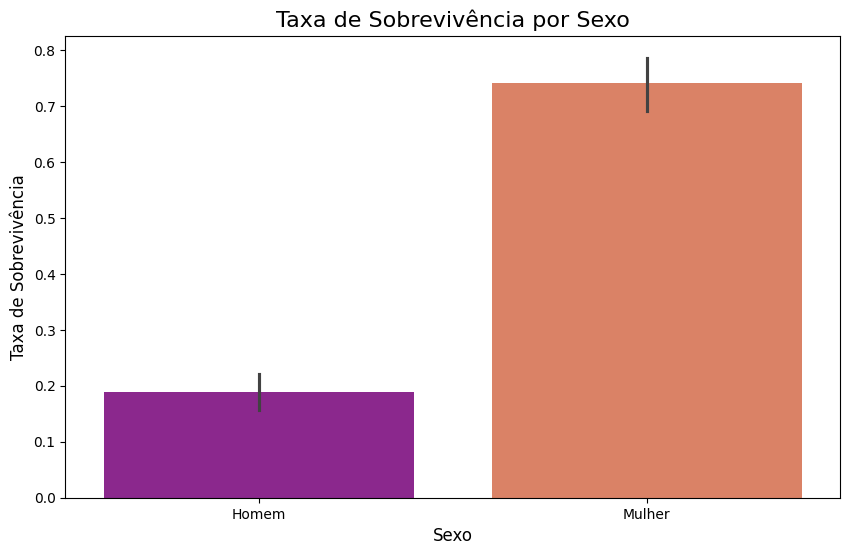

In [33]:
# Gráfico 2: Taxa de Sobrevivência por Sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df_train, palette='plasma')
plt.title('Taxa de Sobrevivência por Sexo', fontsize=16)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.xlabel('Sexo', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Homem', 'Mulher'])
plt.savefig('sobrevivencia_por_sexo.png')
print("Gráfico 2/5: 'sobrevivencia_por_sexo.png' salvo.")
plt.show()


Gráfico 3/5: 'distribuicao_por_classe.png' salvo.


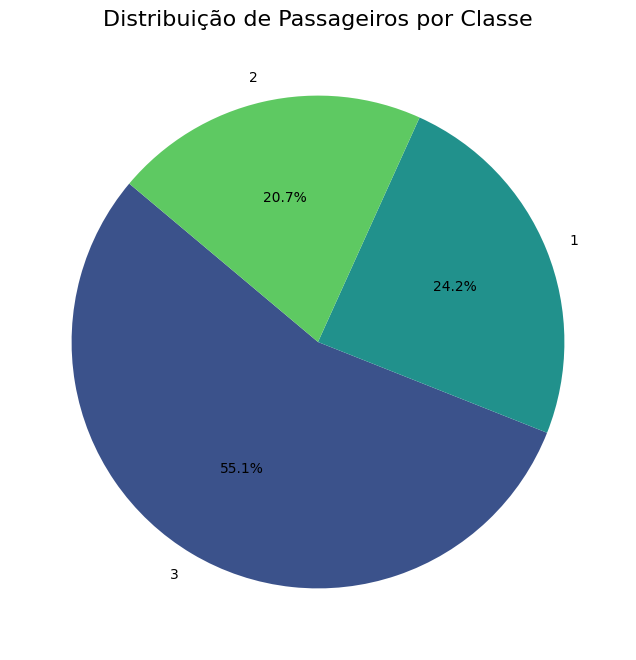

In [34]:
# Gráfico 3: Distribuição de Passageiros por Classe (Gráfico de Pizza)
plt.figure(figsize=(8, 8))
pclass_counts = df_train['Pclass'].value_counts()
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(pclass_counts)))
plt.title('Distribuição de Passageiros por Classe', fontsize=16)
plt.ylabel('')
plt.savefig('distribuicao_por_classe.png')
print("Gráfico 3/5: 'distribuicao_por_classe.png' salvo.")
plt.show()

/tmp/ipython-input-3808340066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df_train, palette='coolwarm')


Gráfico 4/5: 'idade_por_classe.png' salvo.


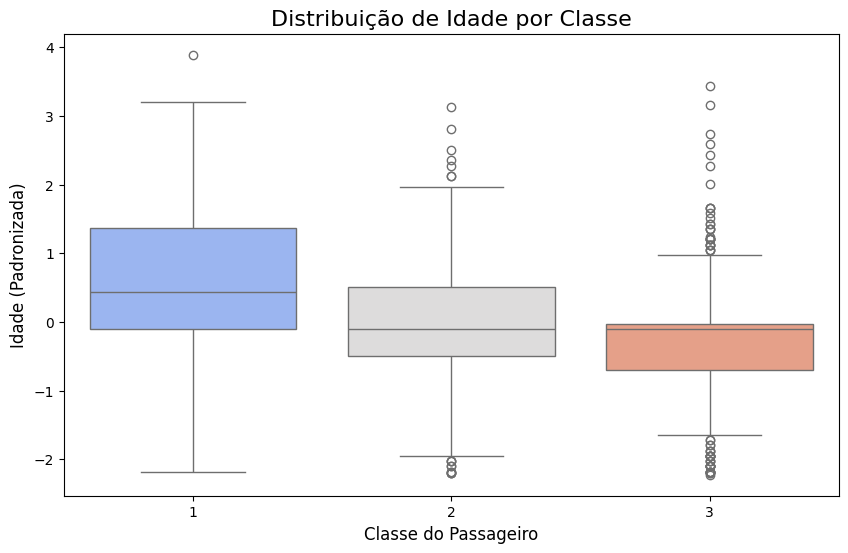

In [35]:
# Gráfico 4: Distribuição de Idade por Classe (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df_train, palette='coolwarm')
plt.title('Distribuição de Idade por Classe', fontsize=16)
plt.xlabel('Classe do Passageiro', fontsize=12)
plt.ylabel('Idade (Padronizada)', fontsize=12)
plt.savefig('idade_por_classe.png')
print("Gráfico 4/5: 'idade_por_classe.png' salvo.")
plt.show()

Gráfico 5/5: 'dispersao_idade_tarifa.png' salvo.


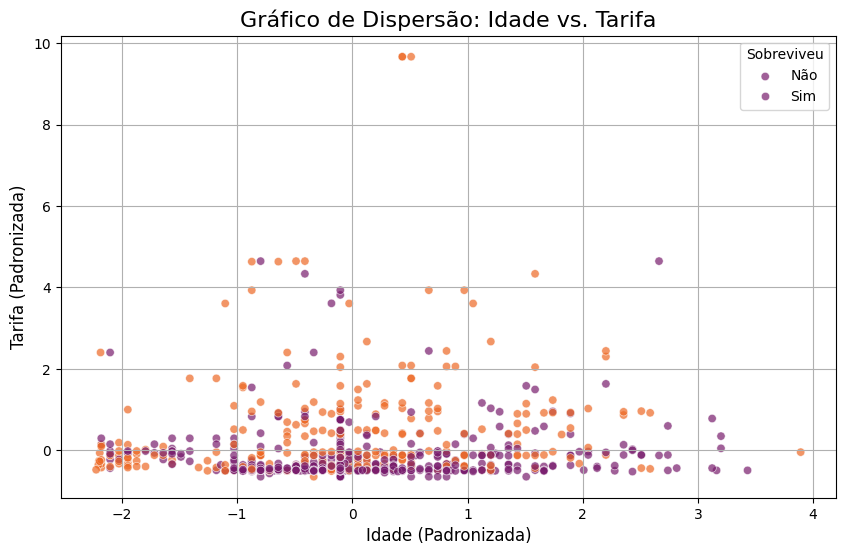

In [36]:
# Gráfico 5: Gráfico de Dispersão entre Idade e Tarifa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df_train, hue='Survived', palette='inferno', alpha=0.7)
plt.title('Gráfico de Dispersão: Idade vs. Tarifa', fontsize=16)
plt.xlabel('Idade (Padronizada)', fontsize=12)
plt.ylabel('Tarifa (Padronizada)', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.grid(True)
plt.savefig('dispersao_idade_tarifa.png')
print("Gráfico 5/5: 'dispersao_idade_tarifa.png' salvo.")
plt.show()

In [37]:
# Salva o DataFrame processado em um novo arquivo CSV, que também aparecerá no painel de arquivos.
df_train.to_csv('titanic_tratado.csv', index=False)
print("\nDataFrame final foi salvo como 'titanic_tratado.csv'.")
print("\nANÁLISE COMPLETA CONCLUÍDA!")


DataFrame final foi salvo como 'titanic_tratado.csv'.

ANÁLISE COMPLETA CONCLUÍDA!
